In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = sign(half_max - array(Y[0:-1])) - sign(half_max - array(Y[1:]))
    #plt.plot(X,d) #if you are interested
    #find the left and right most indexes
    left_idx = find(d > 0)[0]
    right_idx = find(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)

In [3]:
def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

In [4]:
from lmfit import  Model

def FWHM_gauss(x,y):
    gmodel = Model(gaussian)
    result = gmodel.fit(y, x=x, cen=1, amp=1, wid=1)
    return 2*np.sqrt(2*np.log(2))*result.values['wid']

In [5]:
def peak_area(data):
    #fwhm=FWHM_gauss(data['x'], data['Curve1'])
    fwhm=FWHM(data['x'], data['Curve1'])
    print(fwhm)
    max_height=max(data['Curve1'])
    plt.plot(data['x'], data['Curve1'])
    return max_height*fwhm

['1.063', '3.848', '0.086', '1.693', '2.537', '3.589']
0.03871
0.09121
0.0376614
0.04355
0.04778
0.12959


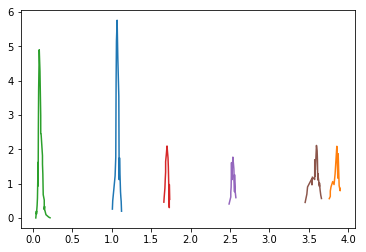

In [6]:
red_names=[name for name in os.listdir('peaks/red') if name.startswith('.') == False]
red=[[],[]]
print(red_names)
for i in red_names:
    #print(i)
    data=pd.read_csv('peaks/red/'+i, sep=',')
    red[0].append(float(i))
    red[1].append( peak_area(data) )

In [7]:
red

[[1.063, 3.848, 0.086, 1.693, 2.537, 3.589],
 [0.22287669600000012,
  0.19051397540000051,
  0.18447043318200007,
  0.091321301499999952,
  0.084732096399999873,
  0.27386384290000065]]

0.03444
0.11195
0.0397027
0.06028
0.0732
0.12917


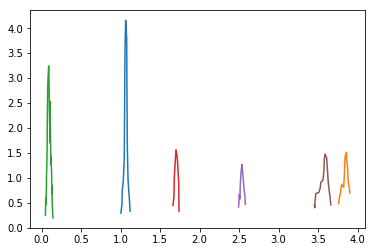

In [8]:
yellow_names=[name for name in os.listdir('peaks/yellow') if name.startswith('.') == False]
yellow=[[],[]]
for i in yellow_names:
    #print(i)
    data=pd.read_csv('peaks/yellow/'+i, sep=',')
    yellow[0].append(float(i))
    yellow[1].append( peak_area(data) )

In [9]:
yellow

[[1.063, 3.848, 0.086, 1.693, 2.537, 3.589],
 [0.1432965744000001,
  0.16938482799999965,
  0.12878325096300003,
  0.094153140400000168,
  0.092843952000000465,
  0.1905993768999997]]

0.04736
0.09904
0.0387517
0.05598
0.06458
0.16362


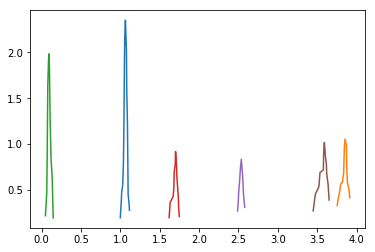

In [10]:
purple_names=[name for name in os.listdir('peaks/purple') if name.startswith('.') == False]
purple=[[],[]]
for i in purple_names:
    #print(i)
    data=pd.read_csv('peaks/purple/'+i, sep=',')
    purple[0].append(float(i))
    purple[1].append( peak_area(data) )

In [11]:
purple

[[1.063, 3.848, 0.086, 1.693, 2.537, 3.589],
 [0.11139782400000016,
  0.10435844800000002,
  0.076927937254999995,
  0.051392271060000126,
  0.053836148300000254,
  0.16627882499999988]]

In [12]:
B_GT=pd.read_csv('clear_B(GT).csv', sep=',')
B_GT_list = B_GT['B(GT)'].loc[B_GT['Ex'].isin(np.array(red[0])*1000)].values

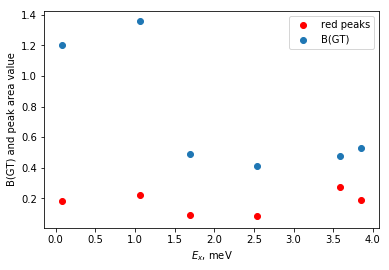

In [13]:
plt.scatter(red[0], np.array(red[1]), c='red', label='red peaks') 
#plt.scatter(yellow[0], np.array(yellow[1])*9, c='yellow', label='yellow peaks') 
#plt.scatter(purple[0], np.array(purple[1]), c='purple', label='purple peaks')
plt.scatter(sorted(red[0]), B_GT_list, label='B(GT)')
plt.xlabel('$E_x$, meV')
plt.ylabel('B(GT) and peak area value')
plt.legend()
plt.savefig('1.png', dpi=500)

### diff cross sec

In [15]:
B_GT.head()

,Unnamed: 0,Ex,Jpi,diff cross-sec,B(GT)
0,1,86.0,1,1.173,1.20
1,2,120.0,1,0.318,0.33
2,3,265.0,1,0.113,0.10
3,5,500.0,"[1+, 2−]",0.621,0.45
4,31,513.8,1,0.725,0.71


In [16]:
cross_sec_list = B_GT['diff cross-sec'].loc[B_GT['Ex'].isin(np.array(red[0])*1000)].values

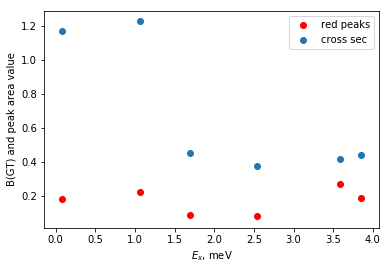

In [17]:
plt.scatter(red[0], np.array(red[1]), c='red', label='red peaks') 
#plt.scatter(yellow[0], np.array(yellow[1])*9, c='yellow', label='yellow peaks') 
#plt.scatter(purple[0], np.array(purple[1]), c='purple', label='purple peaks')
plt.scatter(sorted(red[0]), cross_sec_list, label='cross sec')
plt.xlabel('$E_x$, meV')
plt.ylabel('B(GT) and peak area value')
plt.legend()
plt.savefig('1.png', dpi=500)